In [1]:
from pathlib import Path
BASE_DIR = Path().resolve()
import sys
sys.path.append(str(BASE_DIR.parent / 'scr'))

from dataset_generator import variables, generar_dataset

In [2]:
Nx = 50
Ny = 50
dx = 0.05
dy = 0.05

generar_dataset(1000, Nx, Ny, dx, dy,'dataset_1000_test')

Se tienen 0/1000 muestras generadas.
Se tienen 50/1000 muestras generadas.
Se tienen 100/1000 muestras generadas.
Se tienen 150/1000 muestras generadas.
Se tienen 200/1000 muestras generadas.
Se tienen 250/1000 muestras generadas.
Se tienen 300/1000 muestras generadas.
Se tienen 350/1000 muestras generadas.
Se tienen 400/1000 muestras generadas.
Se tienen 450/1000 muestras generadas.
Se tienen 500/1000 muestras generadas.
Se tienen 550/1000 muestras generadas.
Se tienen 600/1000 muestras generadas.
Se tienen 650/1000 muestras generadas.
Se tienen 700/1000 muestras generadas.
Se tienen 750/1000 muestras generadas.
Se tienen 800/1000 muestras generadas.
Se tienen 850/1000 muestras generadas.
Se tienen 900/1000 muestras generadas.
Se tienen 950/1000 muestras generadas.

Filtrado completado:
Muestras originales: 1000
Muestras después del filtrado: 820
Se genero el Dataset completo con 1000 muestras y guardado en C:\Users\Royer Condori\OneDrive\Documentos\ProyectoFinalModelado\data\dataset_

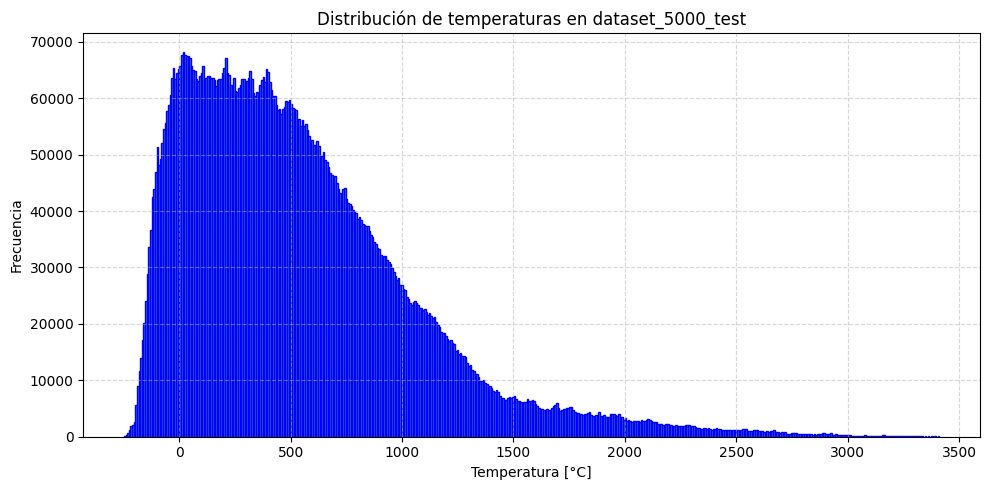

Estadísticas generales de dataset_5000_test:
Temperatura mínima: -248.99 °C
Temperatura máxima: 3411.36 °C
Temperatura media: 536.89 °C
Temperatura std: 515.40 °C

Mostrando muestras más cercanas a los valores promedio del dataset:

Muestra más cercana por temperatura mínima promedio en índice: 2421
Temperatura mínima: 150.83 °C
Temperatura máxima: 938.41 °C
Temperatura media: 608.86 °C
Temperatura std: 176.41 °C

Condiciones de borde y material de la muestra:


material    Cupronickel
k                  29.0
T_fusion         1200.0
T_hp            935.823
i_hp                 18
j_hp                 13
tipo_A              flu
tipo_B              flu
tipo_C             temp
tipo_D              flu
valor_A        5465.647
valor_B       -7650.159
valor_C         938.412
valor_D        5912.649
Name: 2421, dtype: object

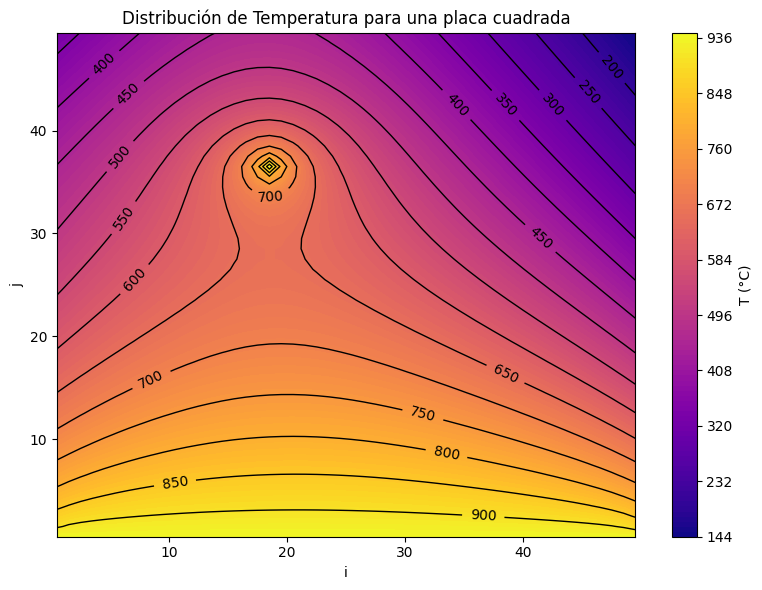


Muestra más cercana por temperatura máxima promedio en índice: 3501
Temperatura mínima: -187.29 °C
Temperatura máxima: 927.46 °C
Temperatura media: 469.24 °C
Temperatura std: 251.75 °C

Condiciones de borde y material de la muestra:


material     Uranium
k               27.0
T_fusion      1132.0
T_hp          652.84
i_hp               2
j_hp              46
tipo_A           flu
tipo_B          temp
tipo_C          temp
tipo_D           flu
valor_A     5413.227
valor_B      927.464
valor_C      553.829
valor_D     9914.518
Name: 3501, dtype: object

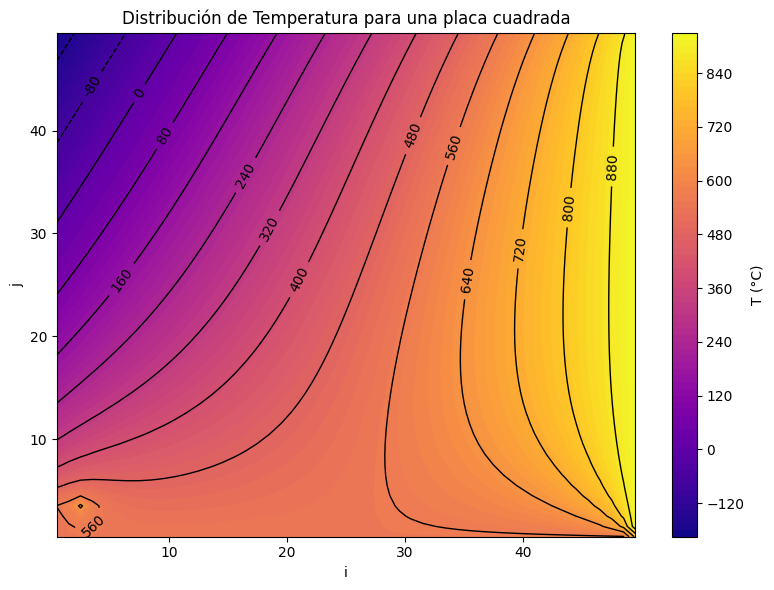


Muestra más cercana por temperatura media promedio en índice: 3067
Temperatura mínima: -72.63 °C
Temperatura máxima: 1143.18 °C
Temperatura media: 536.79 °C
Temperatura std: 312.61 °C

Condiciones de borde y material de la muestra:


material    Platinum
k               71.5
T_fusion      1768.0
T_hp            76.3
i_hp              36
j_hp              34
tipo_A          temp
tipo_B          temp
tipo_C           flu
tipo_D          temp
valor_A     1143.175
valor_B      823.868
valor_C     7711.212
valor_D      -72.631
Name: 3067, dtype: object

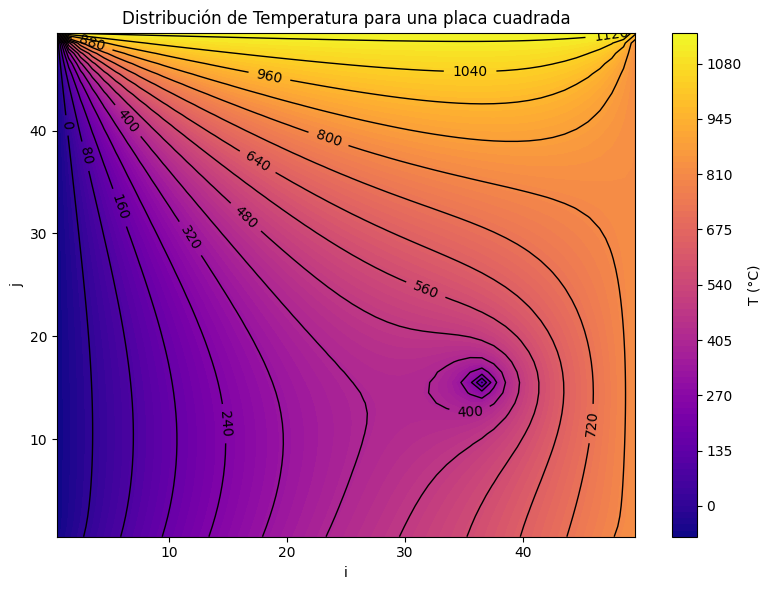


Muestra más cercana por temperatura std promedio en índice: 2897
Temperatura mínima: 314.01 °C
Temperatura máxima: 1013.26 °C
Temperatura media: 620.88 °C
Temperatura std: 161.97 °C

Condiciones de borde y material de la muestra:


material    Steel - Hastelloy B
k                          10.0
T_fusion                 1390.0
T_hp                     694.17
i_hp                         18
j_hp                          2
tipo_A                      flu
tipo_B                      flu
tipo_C                     temp
tipo_D                     temp
valor_A                 192.101
valor_B               -2693.746
valor_C                 1013.26
valor_D                 444.702
Name: 2897, dtype: object

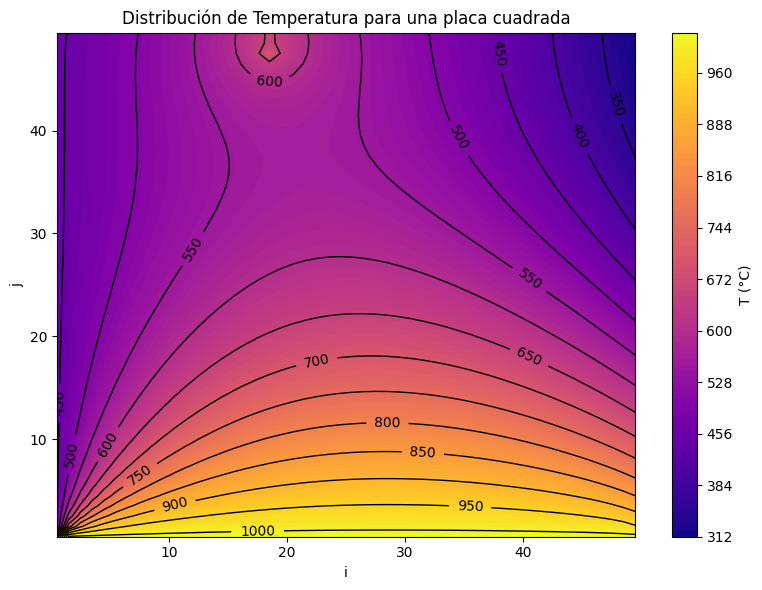

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
from utils import graficarChapa
import matplotlib.pyplot as plt

# ---------------- CONFIGURACIÓN ----------------
BASE_DIR = Path().resolve()

# Rutas de los archivos
folder_name = 'dataset_5000_test'  # cambiar según el dataset a inspeccionar
Y_path = BASE_DIR.parent / 'data' / folder_name / 'Y.npy'
csv_path = BASE_DIR.parent / 'data' / folder_name / 'dataset_variables.csv'

# ---------------- CARGA DE DATOS ----------------
Y_data = np.load(Y_path).astype(np.float32)  # shape (n_samples, 2500)
df_registros = pd.read_csv(csv_path, sep=';')

# ---------------- HISTOGRAMA GENERAL ----------------
Y_flat = Y_data.flatten()

plt.figure(figsize=(10,5))
plt.hist(Y_flat, bins=500, color='steelblue', edgecolor='blue')
plt.title(f"Distribución de temperaturas en {folder_name}")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Estadísticas generales de {folder_name}:")
print(f"Temperatura mínima: {Y_flat.min():.2f} °C")
print(f"Temperatura máxima: {Y_flat.max():.2f} °C")
print(f"Temperatura media: {Y_flat.mean():.2f} °C")
print(f"Temperatura std: {Y_flat.std():.2f} °C")

# ---------------- CÁLCULO DE ESTADÍSTICOS POR MUESTRA ----------------
mins = Y_data.min(axis=1)
maxs = Y_data.max(axis=1)
means = Y_data.mean(axis=1)
stds = Y_data.std(axis=1)

# ---------------- SELECCIÓN AUTOMÁTICA DE OBJETIVOS ----------------
target_min = mins.mean()
target_max = maxs.mean()
target_mean = means.mean()
target_std = stds.mean()

print("\nMostrando muestras más cercanas a los valores promedio del dataset:")

# Encontrar índices más cercanos
idx_min_closest = np.argmin(np.abs(mins - target_min))
idx_max_closest = np.argmin(np.abs(maxs - target_max))
idx_mean_closest = np.argmin(np.abs(means - target_mean))
idx_std_closest = np.argmin(np.abs(stds - target_std))

# Función auxiliar para mostrar información
def mostrar_info(idx, descripcion):
    print(f"\n{descripcion} en índice: {idx}")
    print(f"Temperatura mínima: {mins[idx]:.2f} °C")
    print(f"Temperatura máxima: {maxs[idx]:.2f} °C")
    print(f"Temperatura media: {means[idx]:.2f} °C")
    print(f"Temperatura std: {stds[idx]:.2f} °C")

    print("\nCondiciones de borde y material de la muestra:")
    display(df_registros.iloc[idx])

    Y_sample = Y_data[idx].reshape(50, 50)
    graficarChapa(Y_sample, 50, 50)

# Mostrar cada muestra más cercana
mostrar_info(idx_min_closest, "Muestra más cercana por temperatura mínima promedio")
mostrar_info(idx_max_closest, "Muestra más cercana por temperatura máxima promedio")
mostrar_info(idx_mean_closest, "Muestra más cercana por temperatura media promedio")
mostrar_info(idx_std_closest, "Muestra más cercana por temperatura std promedio")


Columnas disponibles en el CSV:
Index(['Material', 'Tipo ', 'k [W/m·K]', 'T [°C]', 'Fusión [°C] (aprox)'], dtype='object')


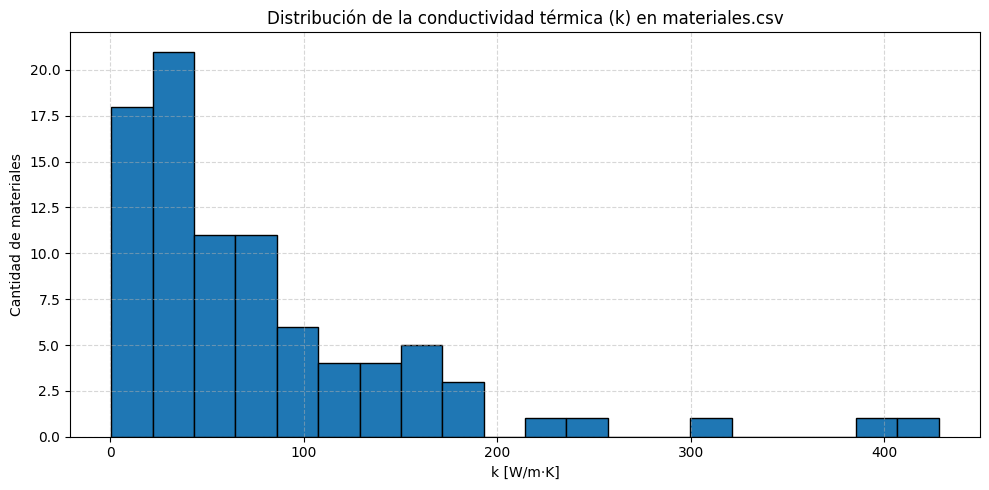

Valor mínimo de k: 0.52 W/m·K
Valor máximo de k: 428.00 W/m·K
Valor medio de k: 78.21 W/m·K
Desvío estándar de k: 80.15 W/m·K


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------- CONFIGURACIÓN ----------------
BASE_DIR = Path().resolve()

csv_path = BASE_DIR.parent / 'data' / 'materiales.csv'

df_materiales = pd.read_csv(csv_path, sep=';')

# ---------------- INSPECCIÓN DE COLUMNAS ----------------
print("Columnas disponibles en el CSV:")
print(df_materiales.columns)

# ---------------- GRAFICAR HISTOGRAMA DE k ----------------
columna_k = 'k [W/m·K]'

plt.figure(figsize=(10,5))
plt.hist(df_materiales[columna_k], bins=20, edgecolor='black')
plt.title("Distribución de la conductividad térmica (k) en materiales.csv")
plt.xlabel("k [W/m·K]")
plt.ylabel("Cantidad de materiales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------- MOSTRAR ESTADÍSTICAS ----------------
print(f"Valor mínimo de k: {df_materiales[columna_k].min():.2f} W/m·K")
print(f"Valor máximo de k: {df_materiales[columna_k].max():.2f} W/m·K")
print(f"Valor medio de k: {df_materiales[columna_k].mean():.2f} W/m·K")
print(f"Desvío estándar de k: {df_materiales[columna_k].std():.2f} W/m·K")
